# smoking_status and bmi = most frequent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
data = pd.read_csv('data/dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


from here we can see there are missing values in smoking_status and bmi

I choose to check what to do with these missed values. Here my options: 
1. Drop those people from my training set 
2. Replace the Nan with the mean of the column
3. Replace the Nan with the max of the column
4. Replace the Nan with the most frequent value of the column

In [4]:
data.smoking_status.fillna('never smoked', inplace=True)

In [5]:
data.bmi.fillna(data.bmi.mode().iloc[0], inplace=True)

In [6]:
target = data.stroke

replacement_map = {
    'ever_married':{'Yes':1, 'No':0},
    'Residence_type':{'Urban':1, 'Rural':0}
}


first_x = data.drop(['stroke', 'id'], axis=1).replace(replacement_map)
x = pd.get_dummies(first_x, columns=['work_type', 'gender', 'smoking_status'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     43400 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [13]:
normalized_x = Normalizer().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(normalized_x, target, test_size=0.2, random_state=0, stratify=target)
print(f'shape of train dataset is x:{x_train.shape} and y:{y_train.shape}')
print(f'shape of test dataset is x:{x_test.shape} and y:{y_test.shape}')

shape of train dataset is x:(34720, 15) and y:(34720,)
shape of test dataset is x:(8680, 15) and y:(8680,)


## DASYN

In [14]:
x_resampled, y_resampled = ADASYN().fit_resample(x_train, y_train)

In [15]:
print(x_resampled.shape)
print(y_resampled.shape)

(67918, 15)
(67918,)


Text(0.5, 1.0, 'Percentage of Strokes')

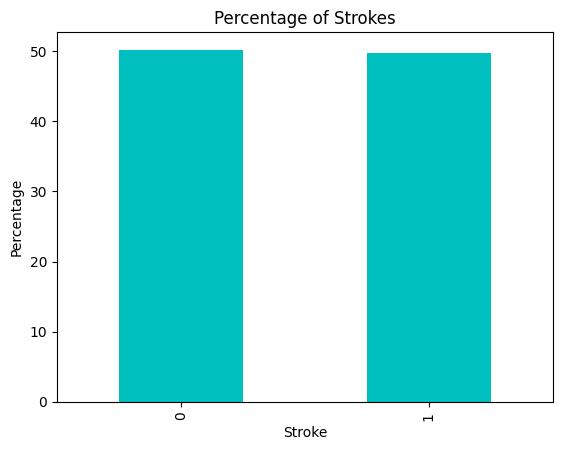

In [16]:
(y_resampled.value_counts(normalize=True)*100).plot(kind='bar', color='c')
plt.xlabel('Stroke')
plt.ylabel('Percentage')
plt.title('Percentage of Strokes')

In [17]:
x_train_set = []
y_train_set = []
x_test_set = []
y_test_set = []

sgkf = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
for train_index, test_index in sgkf.split(x_resampled, y_resampled):
    print(f'train is {len(train_index)} and test is {len(test_index)}')
    x_train_cv, x_test_cv = x_resampled[train_index], x_resampled[test_index]
    y_train_cv, y_test_cv = y_resampled[train_index], y_resampled[test_index]
    x_train_set.append(x_train_cv)
    x_test_set.append(x_test_cv)
    y_train_set.append(y_train_cv)
    y_test_set.append(y_test_cv)

train is 45278 and test is 22640
train is 45279 and test is 22639
train is 45279 and test is 22639


stroke
0    22729
1    22549
Name: count, dtype: int64
stroke
0    22729
1    22550
Name: count, dtype: int64
stroke
0    22730
1    22549
Name: count, dtype: int64


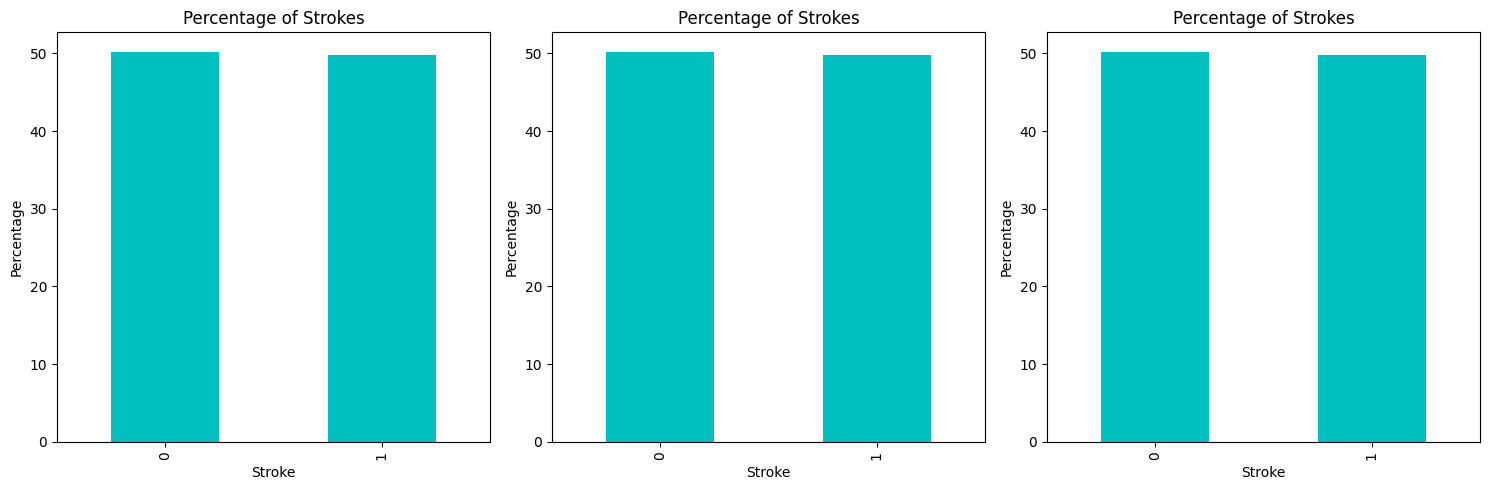

In [18]:
# Create a figure and 5 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting bar plots on each subplot
for i, y_train in zip(range(len(axs)),y_train_set):
    values = (y_train.value_counts(normalize=True)*100)
    print(y_train.value_counts())
    values.plot(kind='bar', color='c', ax=axs[i])
    axs[i].set_xlabel('Stroke')
    axs[i].set_ylabel('Percentage')
    axs[i].set_title('Percentage of Strokes')
    

plt.tight_layout()
plt.show()

stroke
0    11365
1    11275
Name: count, dtype: int64
stroke
0    11365
1    11274
Name: count, dtype: int64
stroke
0    11364
1    11275
Name: count, dtype: int64


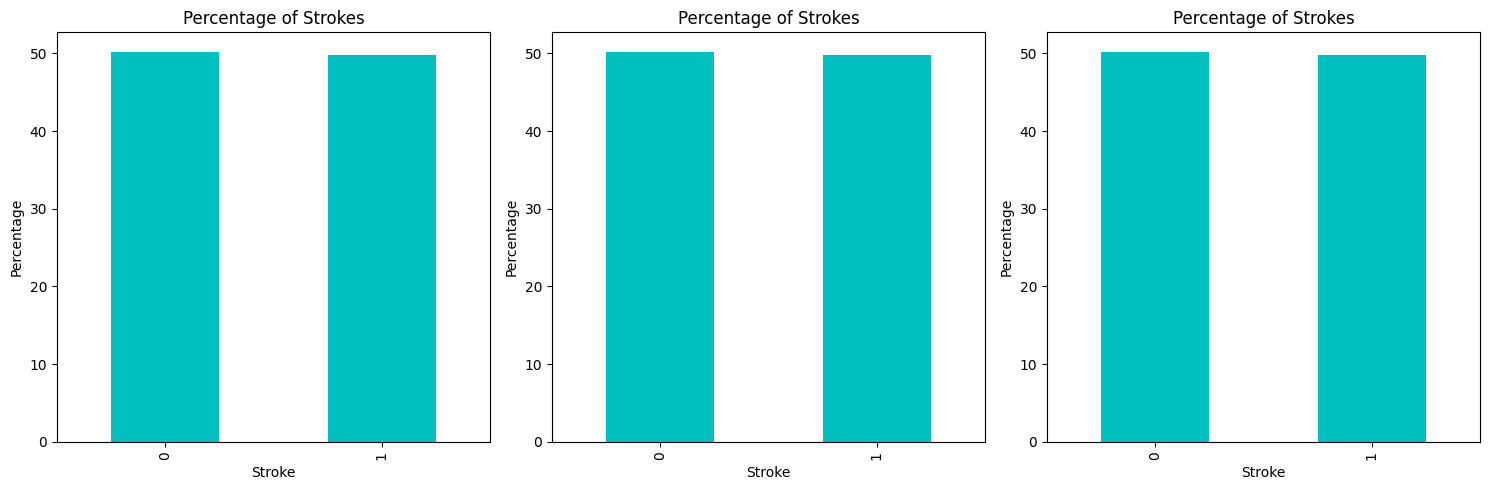

In [19]:
# Create a figure and 5 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting bar plots on each subplot
for i, y_test in zip(range(len(axs)),y_test_set):
    print(y_test.value_counts())
    values = (y_test.value_counts(normalize=True)*100)
    values.plot(kind='bar', color='c', ax=axs[i])
    axs[i].set_xlabel('Stroke')
    axs[i].set_ylabel('Percentage')
    axs[i].set_title('Percentage of Strokes')
    

plt.tight_layout()
plt.show()

### We can see that the data is imbalance

Let's use the imbalnced data technique: in this model I use ADASYN

Let's balance the data with normalization

In [20]:
# for train_x, train_y, test_x, test_y in zip(x_train_set, y_train_set, x_test_set, y_test_set):
#     print(train_y)
#     clf = svm.SVC()
#     clf.fit(train_x, train_y)
#     pred = clf.predict(test_x)
#     f_score = f1_score(test_y, pred)
#     prec = precision_score(test_y, pred)
#     rec = recall_score(test_y, pred)
#     print(f'f1: {f_score}')
#     print(f'precision: {prec}')
#     print(f'recall: {rec}')

# It seems like it doesn't work as we want:)

Let's try other ways

In [21]:
# for train_x, train_y, test_x, test_y in zip(x_train_set, y_train_set, x_test_set, y_test_set):
clf = svm.SVC(class_weight={1:20})
clf.fit(x_train_set[0], y_train_set[0])
pred = clf.predict(x_test_set[0])
f_score = f1_score(y_test_set[0], pred)
prec = precision_score(y_test_set[0], pred)
rec = recall_score(y_test_set[0], pred)
print(f'f1: {f_score}')
print(f'precision: {prec}')
print(f'recall: {rec}')

f1: 0.6652309870788837
precision: 0.4983865977102948
recall: 1.0


<Axes: >

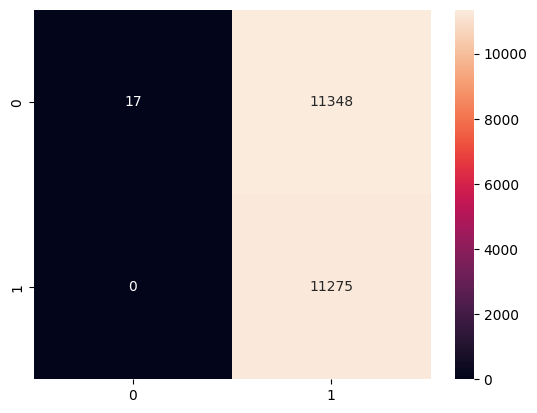

In [22]:
cm = confusion_matrix(y_test_set[0], pred)
sns.heatmap(cm, annot=True, fmt='d')

In [23]:
# for train_x, train_y, test_x, test_y in zip(x_train_set, y_train_set, x_test_set, y_test_set):
clf = svm.SVC(class_weight={1:10})
clf.fit(x_train_set[0], y_train_set[0])
pred = clf.predict(x_test_set[0])
f_score = f1_score(y_test_set[0], pred)
prec = precision_score(y_test_set[0], pred)
rec = recall_score(y_test_set[0], pred)
print(f'f1: {f_score}')
print(f'precision: {prec}')
print(f'recall: {rec}')

f1: 0.6652309870788837
precision: 0.4983865977102948
recall: 1.0


<Axes: >

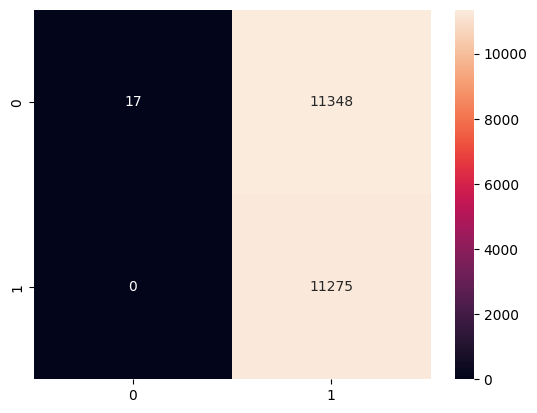

In [24]:
cm = confusion_matrix(y_test_set[0], pred)
sns.heatmap(cm, annot=True, fmt='d')